In [3]:
%load_ext autoreload
%autoreload 2

import pyattimo

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = read_dataset_with_index(file)
# series = series.iloc[::2]
ds_name = "ECG"

print("Size of DS: ", series.shape)

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv
Size of DS:  (3000,)


In [35]:
# Now we can find k-motiflets:
#  - w is the window length
#  - repetitions is the number of LSH repetitions
start = time.time()

max_k = 20
w = 175
m_iter = pyattimo.MotifletsIterator(
    series, w=w, max_k=max_k
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered "+str(max_k)+" motiflets in", end - start, "seconds")    

[34, 418]
0.6061483677980295
[36, 292, 548]
1.0784486250389913
[1567, 1879, 2168, 2728]
5.47474019387246
[1260, 1683, 1889, 2178, 2738]
10.244425405718344
[1260, 1683, 1889, 2178, 2461, 2738]
11.093602558694954
[11, 267, 523, 1580, 1892, 2180, 2742]
13.822826871057005
[17, 274, 529, 1269, 1692, 1897, 2187, 2747]
14.306994202341432
[53, 308, 693, 1515, 1728, 1934, 2223, 2505, 2783]
16.053956727085936
[13, 266, 523, 971, 1262, 1580, 1892, 2181, 2370, 2741]
16.802897087410976
[13, 273, 525, 864, 1264, 1475, 1689, 1895, 2075, 2467, 2744]
17.216976749575778
[23, 280, 542, 874, 1401, 1594, 1799, 2001, 2195, 2381, 2573, 2754]
17.77364205375517
[4, 247, 501, 765, 1060, 1241, 1452, 1668, 1871, 2160, 2351, 2539, 2722]
19.27072017840998
[29, 216, 414, 651, 839, 1171, 1450, 1773, 2051, 2343, 2609, 2784]
21.52038586199489
[72, 279, 456, 631, 830, 1048, 1227, 1435, 1653, 1857, 2037, 2223, 2429, 2604, 2790]
23.074275366173946


thread '<unnamed>' panicked at /Users/runner/work/attimo/attimo/src/knn.rs:373:17:
assertion failed: neighborhood.is_sorted()


PanicException: assertion failed: neighborhood.is_sorted()

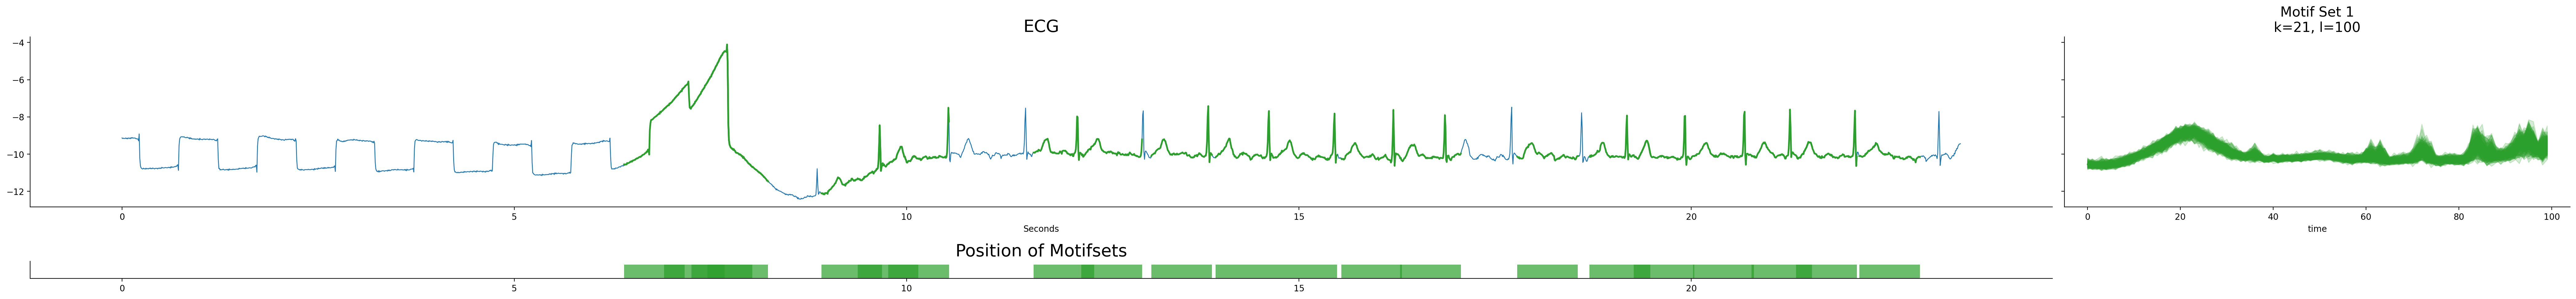

(<Figure size 4200x500 with 3 Axes>,
 array([[<Axes: title={'center': 'ECG'}, xlabel='Seconds'>,
         <Axes: title={'center': 'Motif Set 1\nk=21, l=100'}, xlabel='time', ylabel='value'>],
        [<Axes: title={'center': 'Position of Motifsets'}>, <Axes: >]],
       dtype=object))

In [12]:
motifs = [[819, 884, 929, 955, 1141, 1200, 1250, 
           1487, 1565, 1679, 1784, 1883, 1989, 
           2085, 2276, 2394, 2466, 2563, 2658, 2731, 2834]]

plot_motifsets(
    ds_name,
    series,
    motifsets=motifs,
    motif_length=100)

In [ ]:
k=10
mot = Motiflets("ECG", series)
_ = mot.fit_k_elbow(k, 1000)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [ ]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

In [ ]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

In [ ]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2
